In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
# Step 2: Generate Synthetic Process Dataset
# Simulate 3 classes of process states (Normal, Degraded, Faulty)
X, y = make_classification(
    n_samples=1000,
    n_features=6,
    n_informative=4,
    n_redundant=0,
    n_clusters_per_class=1,
    n_classes=3,
    random_state=42
)

df = pd.DataFrame(X, columns=[f"sensor_{i}" for i in range(1, 7)])
df['process_state'] = y

print("Dataset shape:", df.shape)
print(df.head())

Dataset shape: (1000, 7)
   sensor_1  sensor_2  sensor_3  sensor_4  sensor_5  sensor_6  process_state
0 -0.266710  0.718760 -0.292089 -0.058646 -1.549165 -1.416056              2
1 -0.250058 -1.714599  0.639759  0.054887 -0.539716 -0.125065              0
2  1.075180  1.217221 -0.568056 -0.772375 -0.095405 -0.573292              1
3  0.411396 -1.708043  0.791030 -2.015260 -0.276453  0.251569              0
4  1.054536  1.242690 -1.680376  0.813732 -2.579462 -3.109196              0


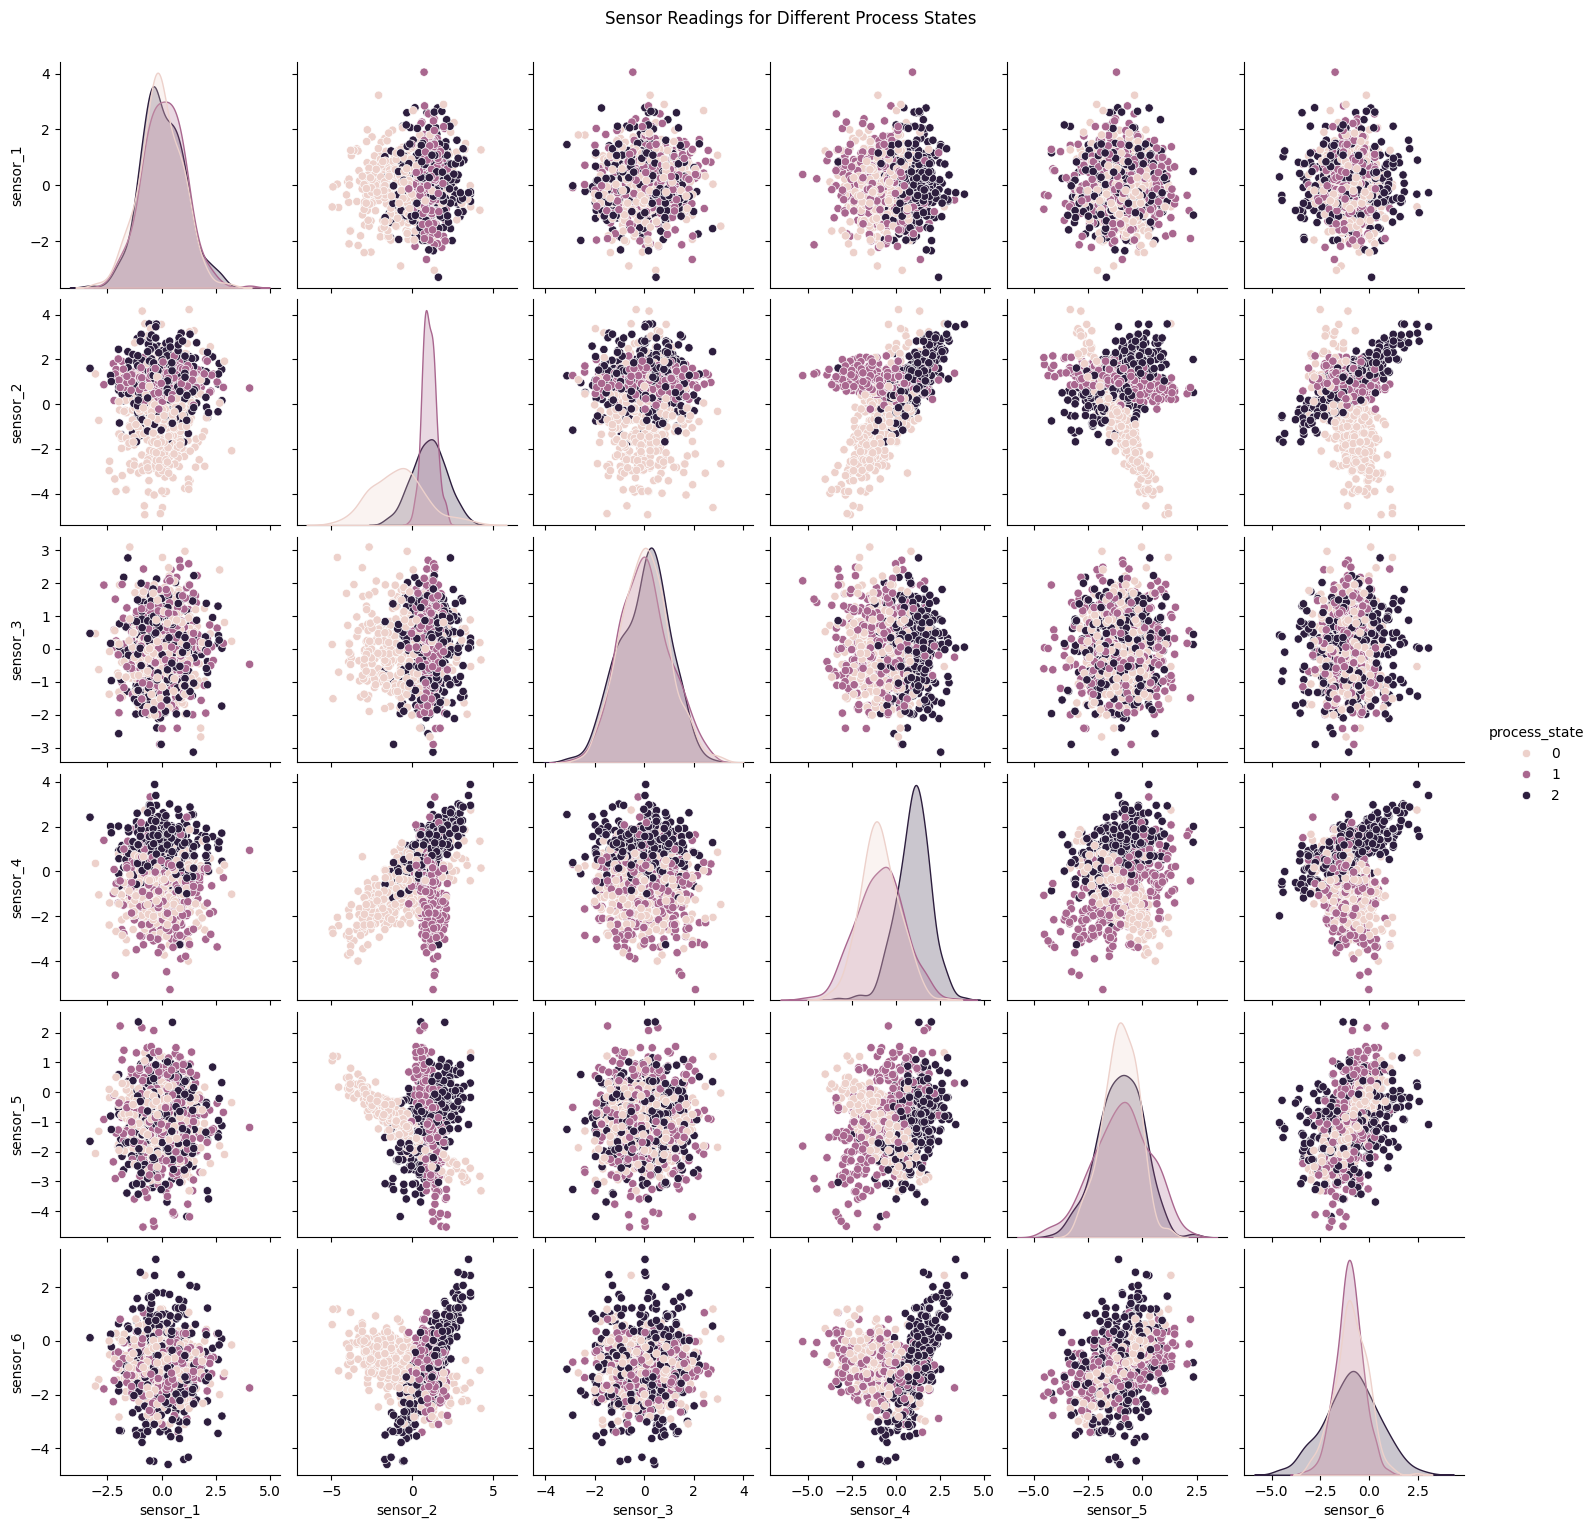

In [ ]:
# Step 3: Data Visualization
sns.pairplot(df, hue="process_state", diag_kind="kde")
plt.suptitle("Sensor Readings for Different Process States", y=1.02)
plt.show()

In [ ]:
# Step 4: Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop(columns=['process_state']))
y = df['process_state']

In [1]:
# Step 5: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

NameError: name 'train_test_split' is not defined

In [ ]:
# Step 6: Process Classification using Random Forest
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.87      0.91        67
           1       0.84      0.89      0.87        66
           2       0.86      0.88      0.87        67

    accuracy                           0.88       200
   macro avg       0.88      0.88      0.88       200
weighted avg       0.88      0.88      0.88       200

